## First EPIAS Analysis

### 1. Install, Import Libraries

In [21]:
! python -m pip install transparencyEpias
# Thanks to Ela EREN for preparing transparencyEpias

In [1]:
import pandas as pd 
import requests
import json
import transparency_epias
from datetime import timedelta 
from datetime import datetime

from transparency_epias.markets import validate as val
from transparency_epias.markets import dayaheadClient
from transparency_epias.production import productionClient
from transparency_epias.consumption import consumptionClient
from transparency_epias.gas import gasTraClients as gast

print('Libraries Imported')

Libraries Imported


### 2. Get a list to check if data is available

In [2]:
mcp_list = dayaheadClient.dayahead.mcp(startDate='2020-05-10',endDate='2020-05-10')[1]
mcp_list

[249.99,
 322.22,
 321.82,
 321.81,
 310.01,
 214,
 79.96,
 14.04,
 1,
 0,
 0,
 0,
 0.87,
 1,
 4,
 13.99,
 97.45,
 227.57,
 299.99,
 323.23,
 321.85,
 308.56,
 289.8,
 284.99]

### 3. Gas Values 

#### 3.1 Stock Level

Define the dates first to get the Gas stock in the pipeline

In [31]:
start_date = '2020-10-01'
end_date = '2020-10-31'

In [17]:
stock_level = pd.DataFrame(columns=['GasDay','GasStock'])
s_level = gast.gas_transmission.stock_amoutn(startDate=start_date,endDate=end_date)[1]

x=0
daterange = pd.date_range(start_date, end_date)
for single_date in daterange:
    #    new_row = {'GasDay':single_date.strftime("%Y-%m-%d"), 'GasStock':s_level}
    a= single_date.strftime("%Y-%m-%d")
    b= s_level[x]
    new_row = {'GasDay':a, 'GasStock':b}
    stock_level = stock_level.append(new_row, ignore_index=True)
    x=x+1
stock_level

,GasDay,GasStock
0,2020-10-01,368024167
1,2020-10-02,370337653
2,2020-10-03,372219021
3,2020-10-04,370363348
4,2020-10-05,370053845
5,2020-10-06,371240308
6,2020-10-07,370740284
7,2020-10-08,369839287
8,2020-10-09,367213653
9,2020-10-10,367220529


#### 3.2 Plot Stock Level

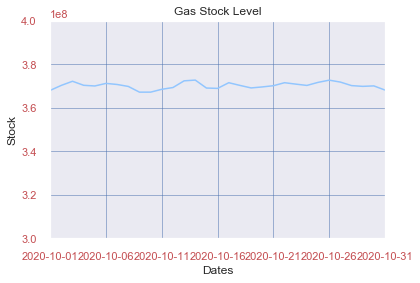

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.style.use('seaborn-pastel')

fig, ax = plt.subplots()

stock_level.plot(kind='line', y="GasStock", x="GasDay", ax=ax)

ax.set_ylim([300000000, 400000000])
ax.set(title='Gas Stock Level', xlabel='Dates', ylabel='Stock')
ax.legend().set_visible(False)

ax.tick_params(direction='out', length=10, width=5, colors='r', grid_color='b', grid_alpha=0.5)

Plot Nominations

In [29]:
dfnominations = pd.DataFrame(columns=['GasDay','Entry Nomination', 'Exit Nomination'])
s_level = gast.gas_transmission.transport(startDate=start_date,endDate=end_date)

x=0
daterange = pd.date_range(start_date, end_date)
for single_date in daterange:
#    new_row = {'GasDay':single_date.strftime("%Y-%m-%d"), 'GasStock':s_level}
    a = single_date.strftime("%Y-%m-%d")
    b = s_level[1][x]
    c = s_level[2][x]
    new_row = {'GasDay':a, 'Entry Nomination':b, 'Exit Nomination':c}
    dfnominations = dfnominations.append(new_row, ignore_index=True)
    x=x+1
dfnominations

,GasDay,Entry Nomination,Exit Nomination
0,2020-05-01,78449275,77818975
1,2020-05-02,79529006,80436706
2,2020-05-03,77081215,76271910
3,2020-05-04,85159216,85553065
4,2020-05-05,89038615,87534065
5,2020-05-06,95073260,92178560
6,2020-05-07,94247576,94508060
7,2020-05-08,91071526,91433960
8,2020-05-09,86750855,86364705
9,2020-05-10,76434505,78381355


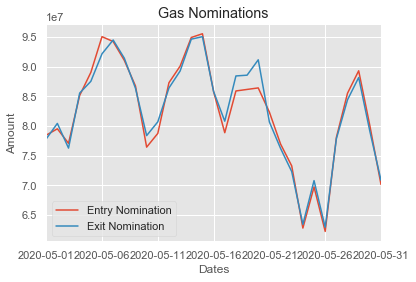

In [30]:
plt.style.use('ggplot')

fig, ax = plt.subplots()

dfnominations.plot(kind='line', x="GasDay", ax=ax)

# ax.set_ylim([0, 300000000])
ax.set(title='Gas Nominations', xlabel='Dates', ylabel='Amount')
ax.legend().set_visible(True)

# ax.tick_params(direction='out', length=10, width=5, colors='r', grid_color='b', grid_alpha=0.5)